### EDA

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, date, time, timedelta
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
#importing over and undersampling algorithms from imblearn (you will have to manually install it in your envoirenment with pip install imblearn) 
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

In [1]:
# important functions
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    # Plot the confusion matrix
    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)

def print_evaluations(y,predictions):
    print(f"Accuracy: {accuracy_score(y, predictions)}")
    print(f"Precision: {precision_score(y, predictions)}")
    print(f"Recall: {recall_score(y, predictions)}")
    print(f"F1: {f1_score(y, predictions)}")



NameError: name 'plt' is not defined

In [4]:
data = pd.read_csv('./data/training.csv')


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

In [6]:
data.describe()

,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000


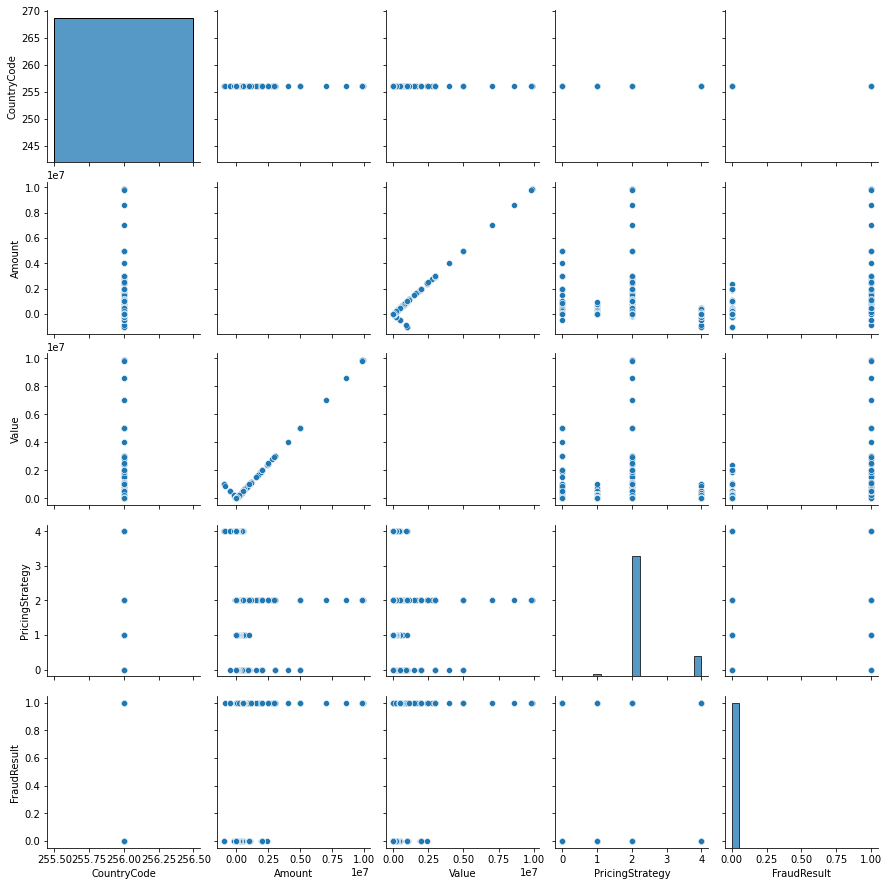

In [7]:
sns.pairplot(data)

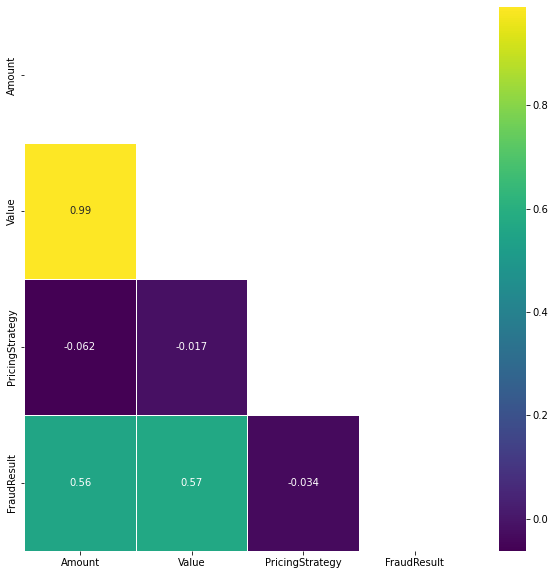

In [8]:
# plotting the correlation matrix on the given data to see how each column correlates to another
fraud_data = data.drop(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId', 'CurrencyCode', 'CountryCode'], axis = 1)
plt.figure(figsize=(10, 10))
matrix = np.triu(fraud_data.corr())
sns.heatmap(fraud_data.corr(), annot=True,
            linewidth=.8, mask=matrix, cmap="viridis");

In [9]:
# Convert time to datatime format
data['TransactionStartTime'] = pd.to_datetime(data['TransactionStartTime'], format='%Y-%m-%dT%H:%M:%SZ')
data['Hour'] = data['TransactionStartTime'].dt.hour


In [10]:
#Creating a new variable
data.loc[data['Amount'] >= 0, 'DirectionOfMoney'] = 0
data.loc[data['Amount'] < 0, 'DirectionOfMoney'] = 1


In [11]:
#Creating the final dataset
cat_var = ['PricingStrategy', 'ProviderId', 'ProductId', 'ChannelId', 'ProductCategory', 'Hour', 'DirectionOfMoney']
con_variables = ['Value']
features_cat = pd.get_dummies(data[cat_var])
features_cat
df = data[con_variables].merge(features_cat, left_index=True, right_index=True, how='inner')


In [12]:
#defining X and y
X = df
y = data['FraudResult']

/Users/kw/neuefische/fraud/.venv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/kw/neuefische/fraud/.venv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/kw/neuefische/fraud/.venv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpreta

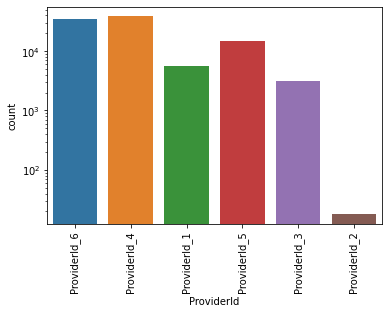

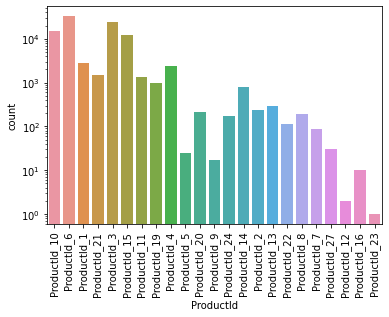

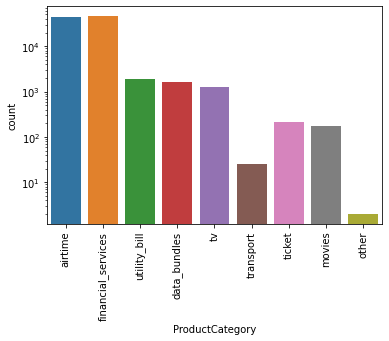

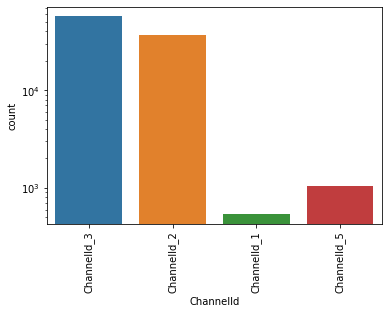

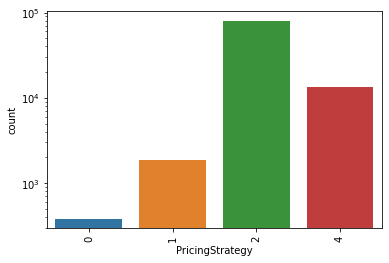

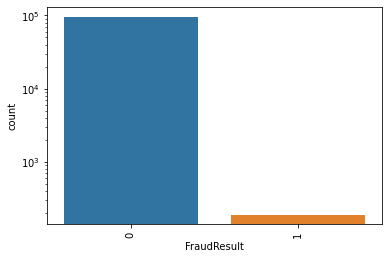

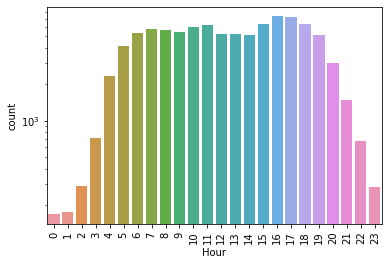

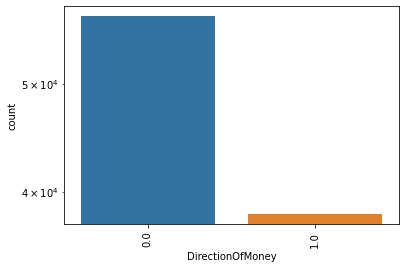

In [13]:
# univariate distributions
for c in data[['ProviderId', 'ProductId','ProductCategory', 'ChannelId','PricingStrategy', 'FraudResult', 'Hour','DirectionOfMoney']].columns:
        plt.figure()
        sns.countplot(data[c])
        plt.xticks(rotation=90)
        plt.yscale('log')


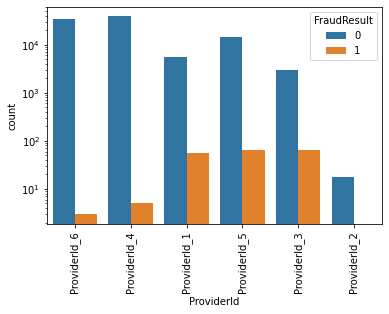

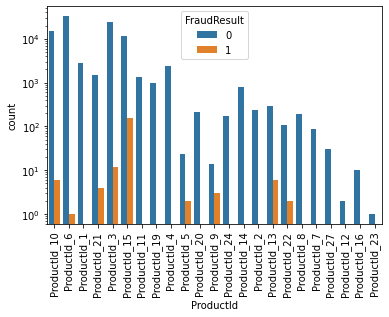

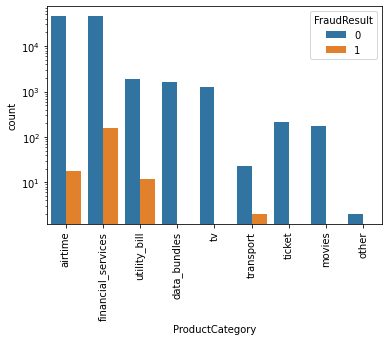

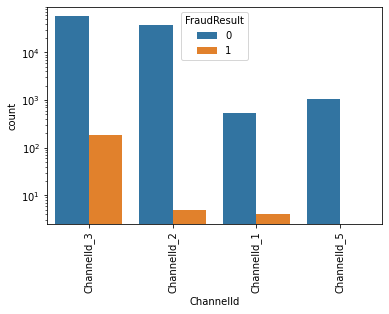

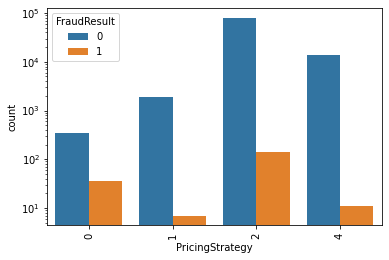

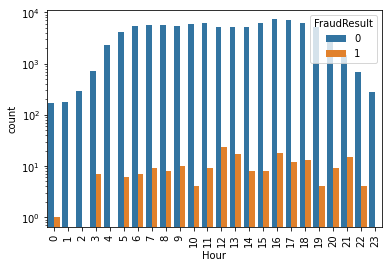

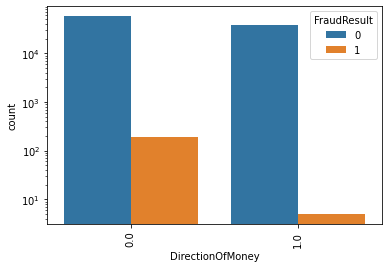

In [14]:
# bivartiate distrobution
for c in data[['ProviderId', 'ProductId','ProductCategory', 'ChannelId','PricingStrategy', 'Hour','DirectionOfMoney']].columns:
        plt.figure()
        #g = sns.FacetGrid(data = data,  col = 'FraudResult')
        sns.countplot(x=c, hue='FraudResult', data = data)
        #g.map(sns.countplot, x = c)
        plt.xticks(rotation=90)
        plt.yscale('log')

#g = sns.FacetGrid(data[['ProviderId', 'ProductId','ProductCategory', 'ChannelId','PricingStrategy', 'FraudResult', 'Hour','DirectionOfMoney', 'FraudResult']], 
#'FraudResult')
#g.map(sns.catplot, 


In [15]:
# creating new column for the log of value (to erase outliers)
df['Valuelog'] = np.log(df['Value'])

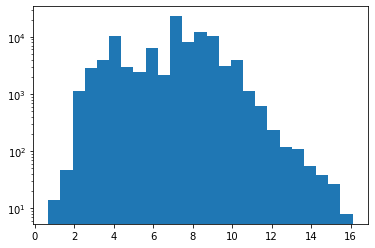

In [16]:
plt.hist(df['Valuelog'], bins=25)
plt.yscale('log')

In [40]:
df.columns

Index(['Value', 'PricingStrategy', 'Hour', 'DirectionOfMoney',
       'ProviderId_ProviderId_1', 'ProviderId_ProviderId_2',
       'ProviderId_ProviderId_3', 'ProviderId_ProviderId_4',
       'ProviderId_ProviderId_5', 'ProviderId_ProviderId_6',
       'ProductId_ProductId_1', 'ProductId_ProductId_10',
       'ProductId_ProductId_11', 'ProductId_ProductId_12',
       'ProductId_ProductId_13', 'ProductId_ProductId_14',
       'ProductId_ProductId_15', 'ProductId_ProductId_16',
       'ProductId_ProductId_19', 'ProductId_ProductId_2',
       'ProductId_ProductId_20', 'ProductId_ProductId_21',
       'ProductId_ProductId_22', 'ProductId_ProductId_23',
       'ProductId_ProductId_24', 'ProductId_ProductId_27',
       'ProductId_ProductId_3', 'ProductId_ProductId_4',
       'ProductId_ProductId_5', 'ProductId_ProductId_6',
       'ProductId_ProductId_7', 'ProductId_ProductId_8',
       'ProductId_ProductId_9', 'ChannelId_ChannelId_1',
       'ChannelId_ChannelId_2', 'ChannelId_ChannelId_3',

In [18]:
# initialising first very simple basline model, every transaction used for financial services is predicte to be fradulent
#used the great method kat showed us
df.loc[df['ProductCategory_financial_services'] == 1, 'Prediction'] = 1
df.loc[df['ProductCategory_financial_services'] != 1, 'Prediction'] = 0
predictions = df.Prediction
df = df.drop('Prediction', axis=1)

In [62]:
condition1 = df['ProductCategory_financial_services'] == 1
condition2 = df['DirectionOfMoney'] == 0
condition3 = df['ChannelId_ChannelId_3'] == 1
condition4 = (df['PricingStrategy'] == 0) | (df['PricingStrategy'] == 2)
condition5 = df["ProductId_ProductId_15"] == 1
condition6 = (df['ProviderId_ProviderId_1'] == 1) | (df['ProviderId_ProviderId_3'] == 1)| (df['ProviderId_ProviderId_5'] == 1)
predictions = condition1 & condition2 & condition3 & condition4 & condition5 & condition6
#printing scores for baseline
print_evaluations(y, predictions)


Accuracy: 0.8771612552528695
Precision: 0.013142375737152484
Recall: 0.8082901554404145
F1: 0.02586421288236757


Accuracy: 0.8771612552528695
Precision: 0.013142375737152484
Recall: 0.8082901554404145
F1: 0.02586421288236757


In [20]:
#defining X and y
X = df
y = data['FraudResult']

In [21]:
#splitting data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [22]:
#used smote algorithm (synthetic oversampling) to oversample fradulent class
# dataframes of synthetic datapoints: smote_data_X, smote_data_Y
smote_algo = SMOTE(random_state=50)
smote_data_X, smote_data_Y = smote_algo.fit_resample(X_train, y_train)
smote_data_X = pd.DataFrame(data=smote_data_X, columns=X_train.columns)
smote_data_Y = pd.DataFrame(data=smote_data_Y, columns=['FraudResult'])

/var/folders/wp/ylcd0z3n66jgx_wrcv4p13v80000gn/T/ipykernel_14849/3608611918.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf.fit(smote_data_X, smote_data_Y)
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Par

Confusion matrix, without normalization
[[31478    26]
 [    7    58]]
Accuracy: 0.9989546707212772
Precision: 0.6904761904761905
Recall: 0.8923076923076924
F1: 0.7785234899328859


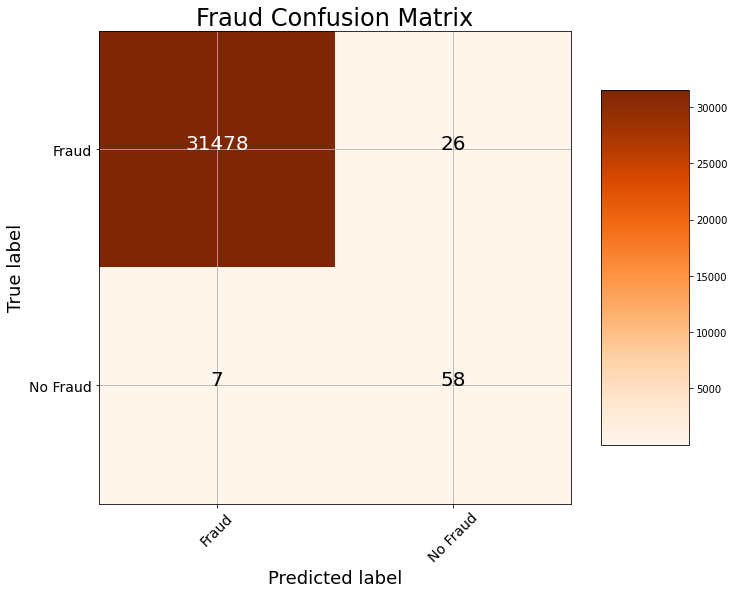

In [23]:
# random forest on oversampled, synthecized (smote) data
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=100, 
                               random_state=50, 
                               max_features = 'sqrt',
                               n_jobs=-1, verbose = 1)
model_rf.fit(smote_data_X, smote_data_Y)
# Training predictions (to demonstrate overfitting)
train_rf_predictions = model_rf.predict(smote_data_X)
train_rf_probs = model_rf.predict_proba(smote_data_X)[:, 1]

# Testing predictions (to determine performance)
test_rf_predictions = model_rf.predict(X_test)
test_rf_probs = model_rf.predict_proba(X_test)[:, 1]

# Confusion matrix
cm = confusion_matrix(y_test, test_rf_predictions)
plot_confusion_matrix(cm, classes = ['Fraud', 'No Fraud'],
                      title = 'Fraud Confusion Matrix')

print_evaluations(y_test, test_rf_predictions)


In [24]:
model_svm = SVC(random_state = 50)
model_svm.fit(smote_data_X, smote_data_Y)

# Training predictions (to demonstrate overfitting)
train_svm_predictions = model_svm.predict(smote_data_X)
train_svm_probs = model_svm.predict_proba(smote_data_X)[:, 1]

# Testing predictions (to determine performance)
test_svm_predictions = model_svm.predict(X_test)
test_svm_probs = model_svm.predict_proba(X_test)[:, 1]

# Confusion matrix
cm = confusion_matrix(y_test, test_svm_predictions)
plot_confusion_matrix(cm, classes = ['Fraud', 'No Fraud'],
                      title = 'Fraud Confusion Matrix')

print_evaluations(y_test, test_svm_predictions)

#model_adaboost =  AdaBoostClassifier(random_state = 50)
#model_adaboost.fit(smote_data_X, smote_data_Y)

/Users/kw/neuefische/fraud/.venv/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AttributeError: predict_proba is not available when  probability=False

/Users/kw/neuefische/fraud/.venv/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion matrix, without normalization
[[31400   104]
 [    4    61]]
Accuracy: 0.9965789223605436
Precision: 0.3696969696969697
Recall: 0.9384615384615385
F1: 0.5304347826086957


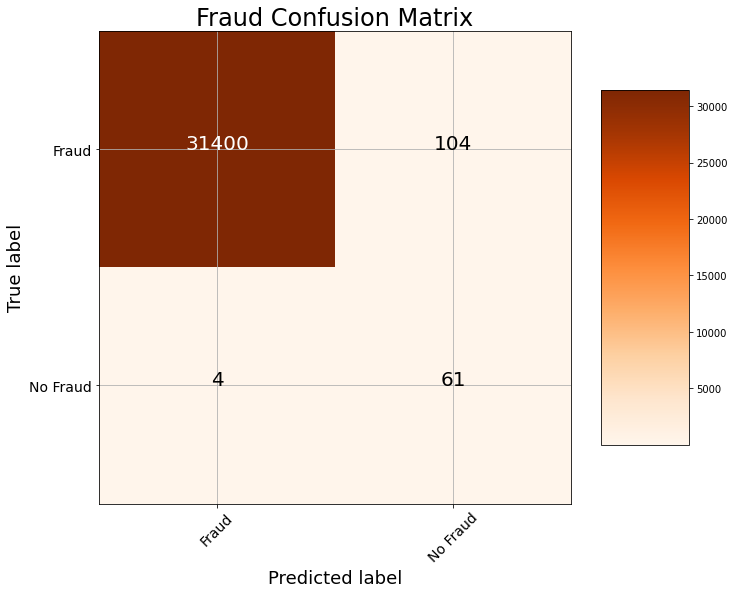

In [27]:
model_adaboost =  AdaBoostClassifier(random_state = 50)
model_adaboost.fit(smote_data_X, smote_data_Y)

# Training predictions (to demonstrate overfitting)
train_adaboost_predictions = model_adaboost.predict(smote_data_X)
train_adaboost_probs = model_adaboost.predict_proba(smote_data_X)[:, 1]

# Testing predictions (to determine performance)
test_adaboost_predictions = model_adaboost.predict(X_test)
test_adaboost_probs = model_adaboost.predict_proba(X_test)[:, 1]

# Confusion matrix
cm = confusion_matrix(y_test, test_adaboost_predictions)
plot_confusion_matrix(cm, classes = ['Fraud', 'No Fraud'],
                      title = 'Fraud Confusion Matrix')

print_evaluations(y_test, test_adaboost_predictions)



In [29]:
# used randomundersampler algorithm to undersample non fradulent class
# dataframes for undersampled data: X_res, y_res
rus = RandomUnderSampler(random_state=50)
X_res, y_res = rus.fit_resample(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_

Confusion matrix, without normalization
[[31239   265]
 [    2    63]]
Accuracy: 0.9915423358357883
Precision: 0.19207317073170732
Recall: 0.9692307692307692
F1: 0.3206106870229008


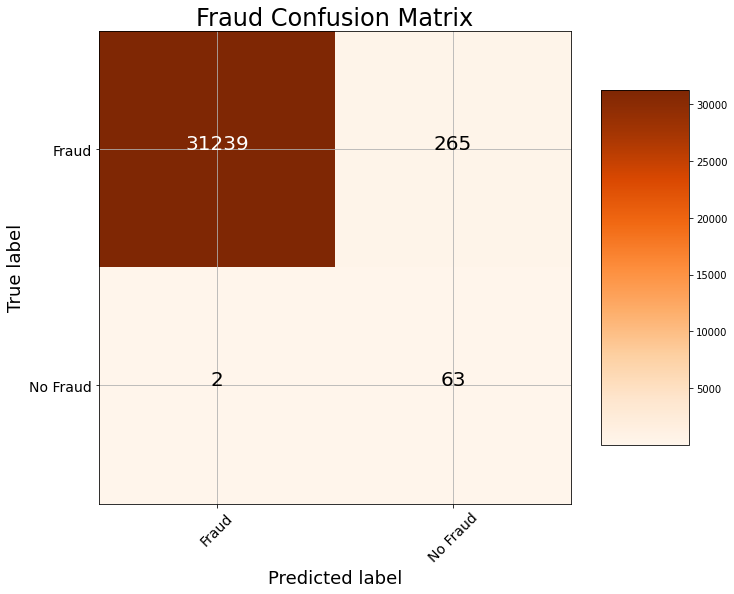

In [ ]:
# fit random forest to undersample
model_rf = RandomForestClassifier(n_estimators=100, 
                               random_state=50, 
                               max_features = 'sqrt',
                               n_jobs=-1, verbose = 1)
model_rf.fit(X_res, y_res)
# Training predictions (to demonstrate overfitting)
train_rf_predictions = model_rf.predict(X_res)
train_rf_probs = model_rf.predict_proba(X_res)[:, 1]

# Testing predictions (to determine performance)
test_rf_predictions = model_rf.predict(X_test)
test_rf_probs = model_rf.predict_proba(X_test)[:, 1]

# Confusion matrix
cm = confusion_matrix(y_test, test_rf_predictions)
plot_confusion_matrix(cm, classes = ['Fraud', 'No Fraud'],
                      title = 'Fraud Confusion Matrix')
print_evaluations(y_test, test_rf_predictions)


Confusion matrix, without normalization
[[31243   261]
 [    2    63]]
Accuracy: 0.9916690424150274
Precision: 0.19444444444444445
Recall: 0.9692307692307692
F1: 0.32390745501285345


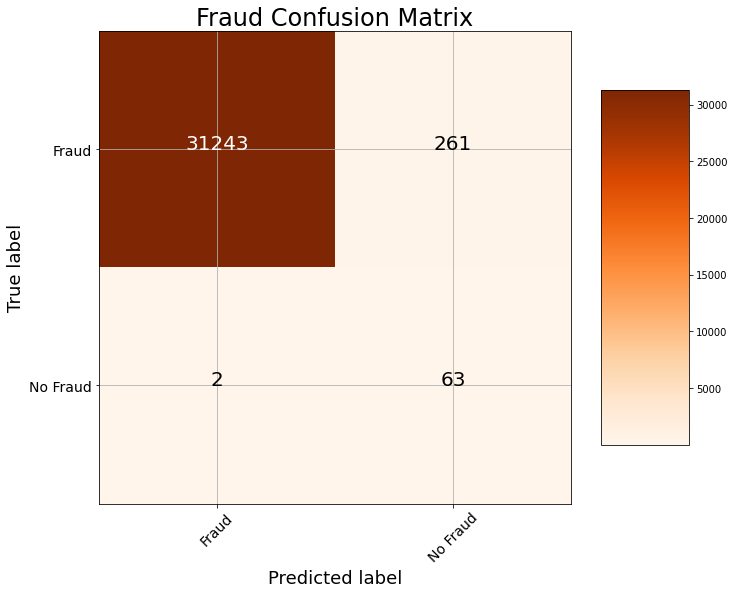

In [30]:
model_adaboost =  AdaBoostClassifier(random_state = 50)
model_adaboost.fit(X_res, y_res)

# Training predictions (to demonstrate overfitting)
train_adaboost_predictions = model_adaboost.predict(X_res)
train_adaboost_probs = model_adaboost.predict_proba(X_res)[:, 1]

# Testing predictions (to determine performance)
test_adaboost_predictions = model_adaboost.predict(X_test)
test_adaboost_probs = model_adaboost.predict_proba(X_test)[:, 1]

# Confusion matrix
cm = confusion_matrix(y_test, test_adaboost_predictions)
plot_confusion_matrix(cm, classes = ['Fraud', 'No Fraud'],
                      title = 'Fraud Confusion Matrix')

print_evaluations(y_test, test_adaboost_predictions)

In [33]:
np.mean(y)

0.00201752001839811

In [34]:
1/500

0.002